# Predicting Used Car prices

The datasets is related to Used Cars in the market to be sold. The datasets contains the following information:
<br>
<br>
1) **Name**: The brand and model of the car.

2) **Location**: The location in which the car is being sold or is available for purchase.

3) **Year**: The year or edition of the model.

4) **Kilometers_Driven**: The total kilometers driven in the car by the previous owner(s) in KM.

5) **Fuel_Type**: The type of fuel used by the car.

6) **Transmission**: The type of transmission used by the car.

7) **Owner_Type**: Whether the ownership is Firsthand, Second hand or other.

8) **Mileage**: The standard mileage offered by the car company in kmpl or km/kg.

9) **Engine**: The displacement volume of the engine in cc.

10) **Power**: The maximum power of the engine in bhp.

11) **Seats**: The number of seats in the car.

12) **New_Price**: Price of new model.

13) **Price**: The price of the used car in INR Lakhs. 


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("datasets/train.csv")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [4]:
#Formatting column names
df.columns = df.columns.str.lower()

# Feature Engineering & Handling Missing Values

In [5]:
df.isna().sum()/len(df)*100

name                  0.000000
location              0.000000
year                  0.000000
kilometers_driven     0.000000
fuel_type             0.000000
transmission          0.000000
owner_type            0.000000
mileage               0.033228
engine                0.598106
power                 0.598106
seats                 0.697790
new_price            86.310018
price                 0.000000
dtype: float64

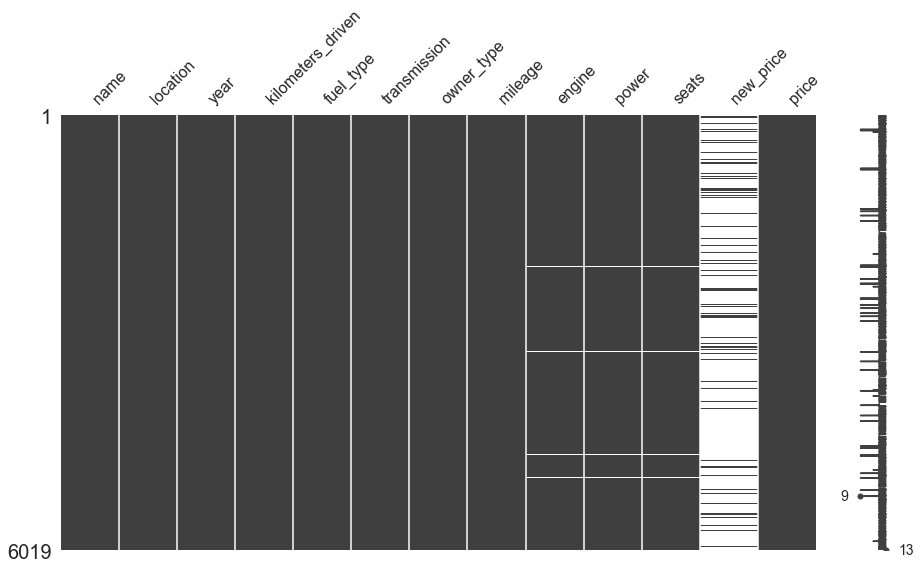

In [6]:
import missingno as msno
msno.matrix(df, figsize = (15,8));

About 86.31% of observations are missing for `new_price` variable. This will be dropped.

In [7]:
df.drop('new_price', axis = 1, inplace = True)

#### Extracting brand and model name from `name` variable

In [8]:
#Modifying some Model names
model_dict = {"Land Rover Range Rover": "Range-Rover", 
              " Series" : "_Series", 
              "Optra Magnum" : "Optra-Magnum", 
              "Grande ": "Grande-", 
              "Figo Aspire" : "Figo-Aspire", 
              "Grand Vitara" : "Grand-Vitara", 
              "Swift Dzire" : "Swift-Dzire", 
              "Vitara Brezza" : "Vitara-Brezza", 
              "Wagon R" : "Wagon-R", 
              "Zen " : "Zen-", 
              "Class" : "-Class", 
              "Zen Estilo" : "Zen-Estilo", 
              "New C-Class" : "New_C-Class", 
              "Mini Clubman Cooper" : "Mini-Cooper Clubman", 
              "Mini Cooper" : "Mini-Cooper", 
              "Pajero Sport" : "Pajero-Sport", 
              "KWID AMT" : "KWID-AMT", 
              "KWID Climber" : "KWID-Climber", 
              "Laura " : "Laura-", 
              "Octavia " : "Octavia-", 
              "Superb Ambition" : "Superb-Ambition", 
              "Superb Elegance" : "Superb-Elegance", 
              "Superb L&K" : "Superb-L&K", 
              "Yeti " : "Yeti-", 
              "Bolt " : "Bolt-", 
              "Indica " : "Indica-", 
              "Manza " : "Manza-", 
              "New Safari" : "New-Safari", 
              "Zest " : "Zest-"}

In [9]:
df['name'] = df['name'].replace(model_dict.keys(), model_dict.values(), regex = True)

In [10]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])
df['model'] = df['name'].apply(lambda x: x.split()[1])
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,brand,model
0,Maruti Wagon-R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon-R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4


In [11]:
df[df.mileage.isna()]

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,brand,model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius


The above vehicles are electric. Its impossible to know the mileage of such a vehicle in terms if km per liter unit. Hence both of these observations will be dropped. 

In [12]:
del_idx = df[df.mileage.isna()].index
df = df.drop(index = del_idx, axis = 0).reset_index(drop = True)

In [13]:
any(df['mileage'].isna())

False

#### Separating mileage into mileage figure and its unit

In [14]:
df['mlg_original'] = df['mileage'].apply(lambda x: x.split()[0]).astype('float64')
df['mlg_unit'] = df['mileage'].apply(lambda x: x.split()[1])

In [15]:
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,brand,model,mlg_original,mlg_unit
0,Maruti Wagon-R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon-R,26.60,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,18.20,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,15.20,kmpl


In [16]:
df['mlg_unit'].value_counts()

kmpl     5951
km/kg      66
Name: mlg_unit, dtype: int64

In [17]:
df.query("mlg_unit == 'km/kg'")['fuel_type'].value_counts()

CNG    56
LPG    10
Name: fuel_type, dtype: int64

Most of the units for mileage are in km per liter. Vehicles thats runs on natural gas usually have their mileage units in km/kg. 
<br>
<br>
According to the internet, km/kg for CNG can be multiplied by 1.39 to convert it to km/L. Similarly for LNG, mileage can be multiplied by 1.96 to convert into km/L.

In [18]:
#Converting to litres
new_mlg = []

for i in range(len(df)):
    if df['fuel_type'][i] == 'CNG':
        new_mlg.append(df['mlg_original'][i] * 1.39)
    elif df['fuel_type'][i] == 'LNG':
        new_mlg.append(df['mlg_original'][i] * 1.96)
    else:
        new_mlg.append(df['mlg_original'][i])
        
df['milage_km_per_L'] = new_mlg

In [19]:
#Dropping old mileage features
df.drop(['mileage', 'mlg_original', 'mlg_unit'], axis = 1, inplace = True)

In [20]:
#Engine missing values
df[df.engine.isna()]

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,engine,power,seats,price,brand,model,milage_km_per_L
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,2.95,Honda,City,0.00
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,NaN,NaN,NaN,2.11,Maruti,Swift,16.10
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,NaN,NaN,NaN,1.75,Maruti,Swift,16.10
749,Range-Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,NaN,NaN,26.50,Range-Rover,3.0,0.00
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,NaN,NaN,NaN,3.20,Honda,City,12.80
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,NaN,NaN,NaN,5.80,Maruti,Swift,16.10
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,1.50,Honda,City,0.00
1460,Range-Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,40.88,Range-Rover,Sport,0.00
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,NaN,NaN,NaN,3.15,Maruti,Swift,16.10
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,1.93,Hyundai,Santro,0.00


Missing values for Engine, Power and seats are for the same observations. Since it is a tedious task to individually to fill corresponding values, I will drop these observations.

In [21]:
idx_drop = df[df.engine.isna()].index
df = df.drop(index = idx_drop, axis = 0).reset_index(drop = True)

In [22]:
#Missing values for seats
df[df.seats.isna()]

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,engine,power,seats,price,brand,model,milage_km_per_L
227,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,1498 CC,99 bhp,NaN,3.60,Ford,Figo,0.0
1909,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,1493 CC,100 bhp,NaN,1.70,Honda,City,13.0
2356,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,1061 CC,null bhp,NaN,1.50,Maruti,Estilo,19.5
3776,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,2953 CC,null bhp,NaN,7.00,Ford,Endeavour,12.8
3857,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,1061 CC,null bhp,NaN,2.50,Maruti,Estilo,19.5
5855,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,1061 CC,null bhp,NaN,1.75,Maruti,Estilo,19.5


In [23]:
#Filling missing values for seats according to the information found on the Internet.
df.at[3776, 'seats'] = 7.0

df.seats.fillna(5.0, inplace = True)

In [24]:
df.isna().sum()

name                 0
location             0
year                 0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
engine               0
power                0
seats                0
price                0
brand                0
model                0
milage_km_per_L      0
dtype: int64

There are no more missing values on the dataset.

In [25]:
del_idx = df.query('power == "null bhp"').index

df = df.drop(index = del_idx, axis = 0).reset_index(drop = True)

In [26]:
df['engine'] = df['engine'].str.replace(" CC", "").astype('int64')
df['power'] = df['power'].str.replace(" bhp", "").astype('float64')
df['year'] = df['year'].astype('category')

# Exploratory Data Analysis

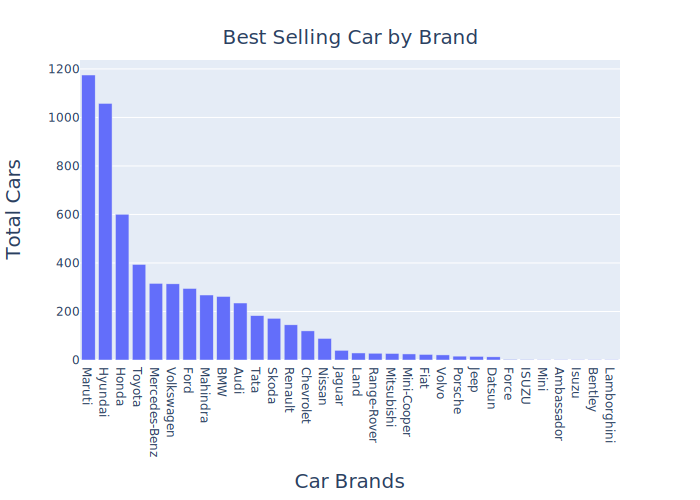

In [27]:
temp_df = df['brand'].value_counts().reset_index().rename(columns = {"index": "brand", "brand":"count"})

ax = px.bar(temp_df, x = 'brand', y = 'count')

ax.update_layout(
    title_text = "Best Selling Car by Brand",
    title_font = {"size": 20},
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

ax.update_xaxes(
        title_text = "Car Brands",
        title_font = {"size": 20}
)

ax.update_yaxes(
        title_text = "Total Cars",
        title_font = {"size": 20}
)

According to the data, the most common cars for sale are Maruti, Hyundai, Honda and Toyota.

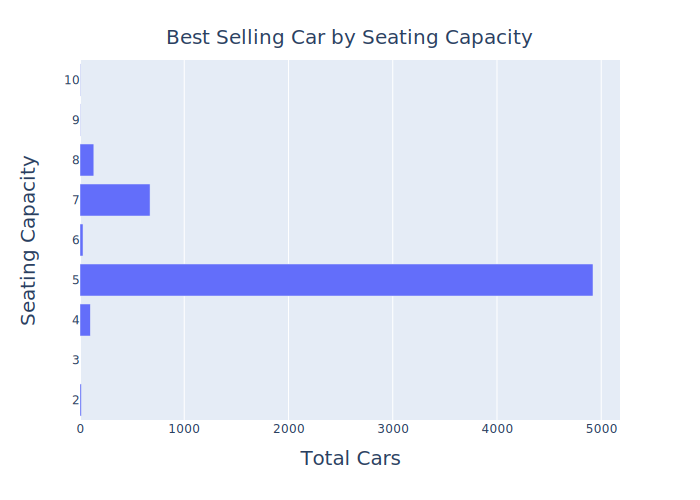

In [28]:
temp_df = df['seats'].value_counts().reset_index().rename(columns = {"index": "seats", "seats":"count"}).\
          sort_values('count')

ax = px.bar(temp_df, y = 'seats', x = 'count', orientation='h')

ax.update_layout(
    title_text = "Best Selling Car by Seating Capacity",
    title_font = {"size": 20},
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

ax.update_xaxes(
        title_text = "Total Cars",
        title_font = {"size": 20}
)

ax.update_yaxes(
        title_text = "Seating Capacity",
        title_font = {"size": 20}
)

5 seater cars are highest in observations.

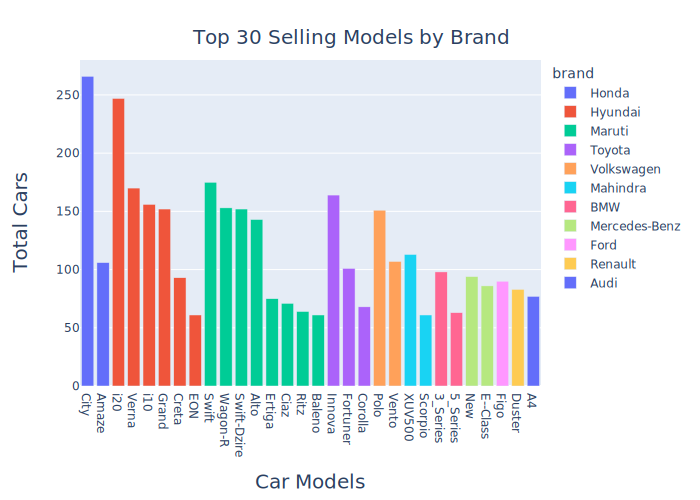

In [29]:
temp_df = df[['model','brand']].value_counts()[:30].reset_index().\
          rename(columns = {0:"count"})

ax = px.bar(temp_df, x = 'model', y = 'count', color = 'brand')

ax.update_layout(
    title_text = "Top 30 Selling Models by Brand",
    title_font = {"size": 20},
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

ax.update_xaxes(
        title_text = "Car Models",
        title_font = {"size": 20}
)

ax.update_yaxes(
        title_text = "Total Cars",
        title_font = {"size": 20}
)

Honda City is the car most sold in the market, followed by Hyundai i20 and Maruti Swift.

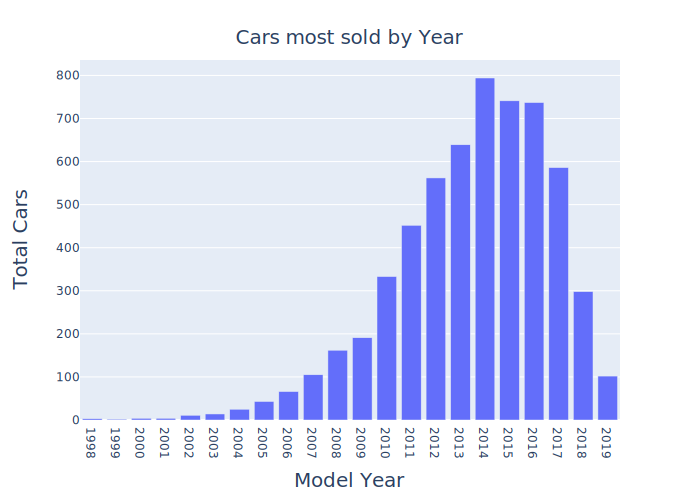

In [30]:
temp_df = df.groupby('year').size().reset_index().rename(columns = {0:'count'})

ax = px.bar(temp_df, x = 'year', y = 'count')

ax.update_xaxes(tickvals = np.arange(1998, 2020,1))

ax.update_layout(
    title_text = "Cars most sold by Year",
    title_font = {"size": 20},
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

ax.update_xaxes(
        title_text = "Model Year",
        title_font = {"size": 20}
)

ax.update_yaxes(
        title_text = "Total Cars",
        title_font = {"size": 20}
)

Most of the cars in the market to be sold are manufactured between 2014 and 2016.

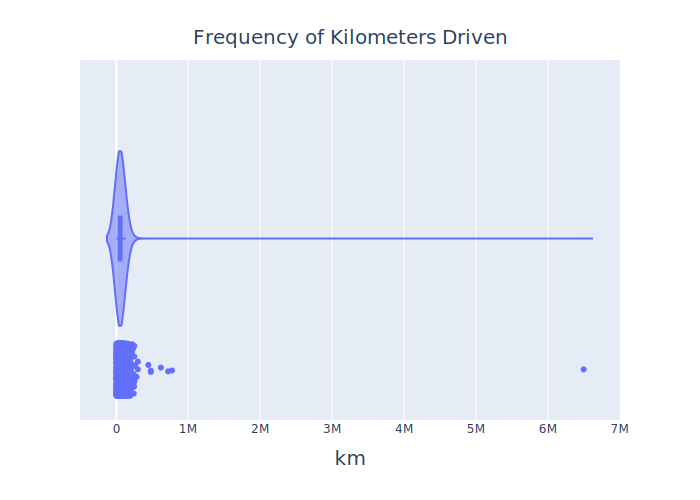

In [31]:
ax = px.violin(x = df['kilometers_driven'], box = True, points='all')

ax.update_layout(
    title_text = "Frequency of Kilometers Driven",
    title_font = {"size": 20},
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

ax.update_xaxes(
        title_text = "km",
        title_font = {"size": 20}
)

There is a clear outlier where according to the data, one particular car in the market has driven 6.5 million kilometers! For better modeling purposes, this observation will be removed.

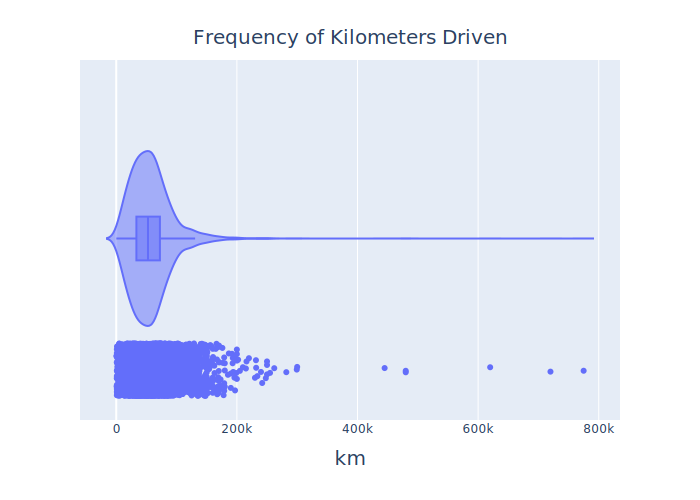

In [32]:
del_idx = df.query('kilometers_driven > 10**6').index

df = df.drop(index = del_idx, axis = 0).reset_index(drop = True)

ax = px.violin(x = df['kilometers_driven'], box = True, points='all')

ax.update_layout(
    title_text = "Frequency of Kilometers Driven",
    title_font = {"size": 20},
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

ax.update_xaxes(
        title_text = "km",
        title_font = {"size": 20}
)

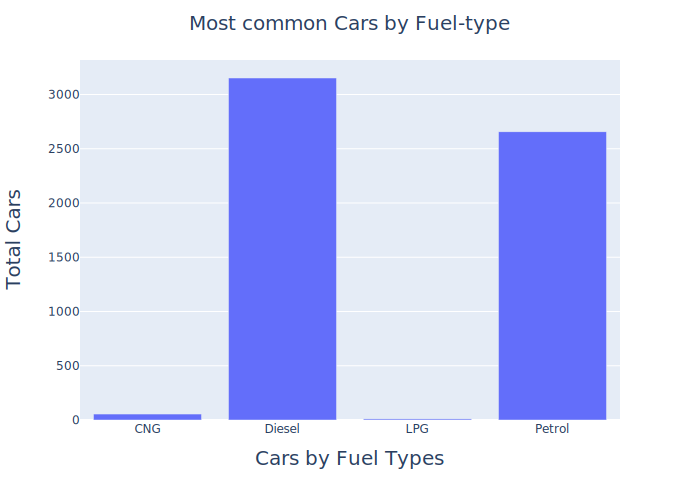

In [33]:
temp_df = df.groupby('fuel_type').size().reset_index().rename(columns = {0:'count'})

ax = px.bar(temp_df, x = 'fuel_type', y = 'count')

ax.update_layout(
    title_text = "Most common Cars by Fuel-type",
    title_font = {"size" : 20},
    title_x = 0.5
)

ax.update_xaxes(
    title_text = "Cars by Fuel Types",
    title_font = {"size" : 20}
)

ax.update_yaxes(
    title_text = "Total Cars",
    title_font = {"size" : 20}
)

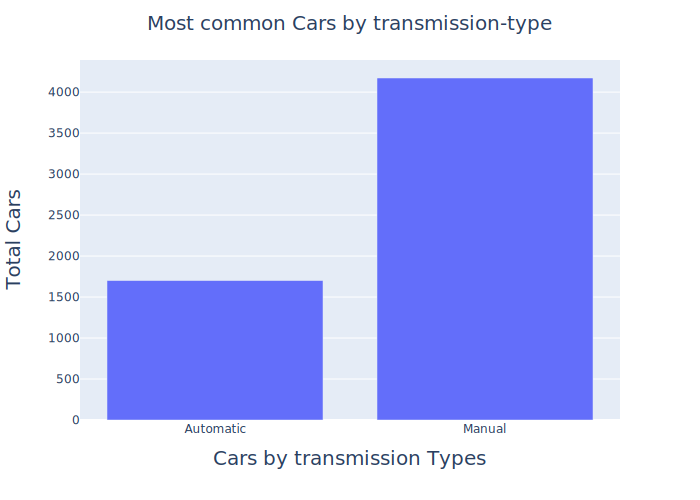

In [34]:
temp_df = df.groupby('transmission').size().reset_index().rename(columns = {0:'count'})

ax = px.bar(temp_df, x = 'transmission', y = 'count')

ax.update_layout(
    title_text = "Most common Cars by transmission-type",
    title_font = {"size" : 20},
    title_x = 0.5
)

ax.update_xaxes(
    title_text = "Cars by transmission Types",
    title_font = {"size" : 20}
)

ax.update_yaxes(
    title_text = "Total Cars",
    title_font = {"size" : 20}
)

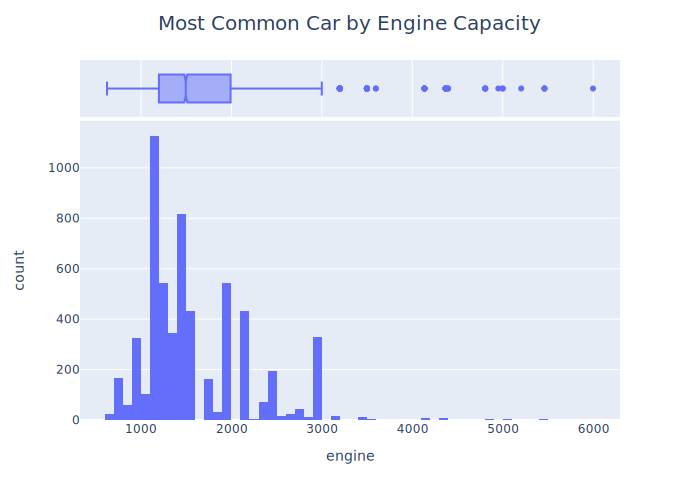

In [35]:
ax = px.histogram(df, x = 'engine', nbins=100, marginal = "box")

ax.update_layout(
    title_text = "Most Common Car by Engine Capacity",
    title_font = {"size" : 20},
    title_x = 0.5
)

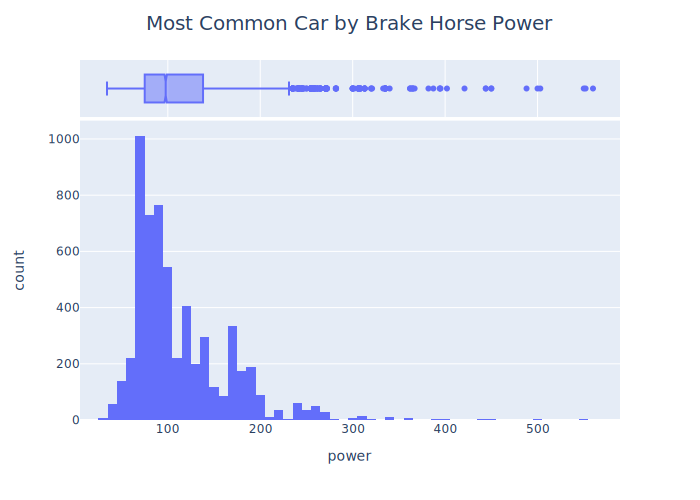

In [36]:
ax = px.histogram(df, x = 'power', nbins=100, marginal = "box")

ax.update_layout(
    title_text = "Most Common Car by Brake Horse Power",
    title_font = {"size" : 20},
    title_x = 0.5
)

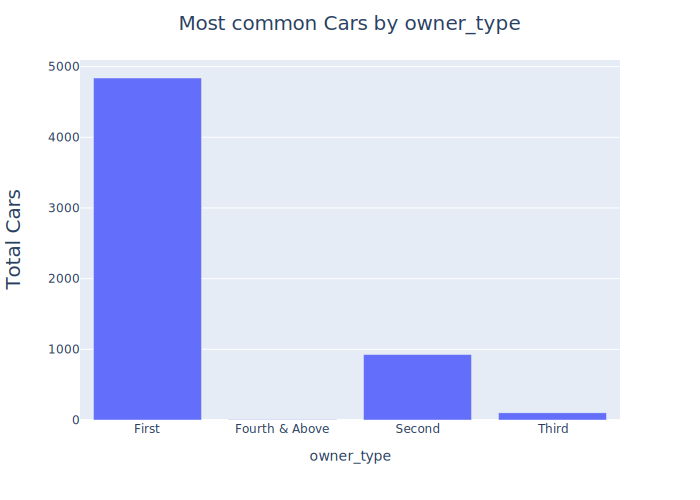

In [37]:
temp_df = df.groupby('owner_type').size().reset_index().rename(columns = {0:'count'})

ax = px.bar(temp_df, x = 'owner_type', y = 'count')

ax.update_layout(
    title_text = "Most common Cars by owner_type",
    title_font = {"size" : 20},
    title_x = 0.5
)

ax.update_yaxes(
    title_text = "Total Cars",
    title_font = {"size" : 20}
)

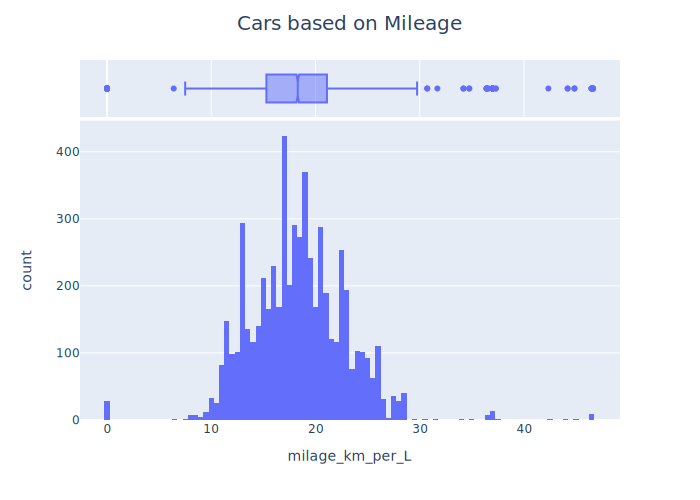

In [38]:
ax = px.histogram(df, x = 'milage_km_per_L', nbins=100, marginal = "box")

ax.update_layout(
    title_text = "Cars based on Mileage",
    title_font = {"size" : 20},
    title_x = 0.5
)

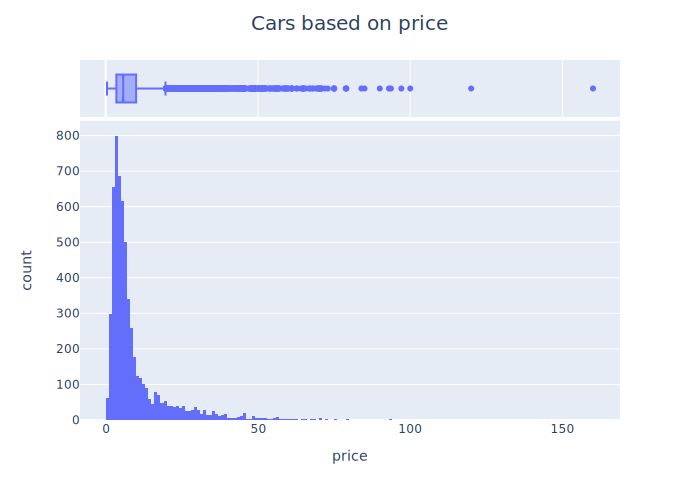

In [39]:
ax = px.histogram(df, x = 'price', nbins=0, marginal = "box")

ax.update_layout(
    title_text = "Cars based on price",
    title_font = {"size" : 20},
    title_x = 0.5
)